In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def first_task(x, t, phi, L, T, E, rho):
    dt = T / t
    dx = L / x
    C = np.sqrt(E / rho) * dt / dx # Courant condition check
    if C > 1:
        raise(Exception('Condition isnt satisfied'))
    
    x_lin = np.linspace(0, L, x)
    
    matrix = np.zeros((t, x))
    matrix[0] = [phi(x) for x in x_lin]
    matrix[1, 1:-1] = [phi(x_lin[i]) * (1 - dt ** 2 / 2) for i in range(1, x - 1)]

    for i in range(1, t-1):
        matrix[i + 1, 1:-1] = C ** 2 * (matrix[i, 2:] - 2 * matrix[i, 1:-1] + matrix[i, :-2]) + 2 * matrix[i, 1:-1] - matrix[i-1, 1:-1]
    return x_lin, matrix

In [52]:
x = 100
t = 10000
L = 18e-2
du = 0.2e-2
phi = lambda x: (-4 * du / L ** 2) * x ** 2 + (4 * du / L) * x
E = 120e9
rho = 5.9e3
T = 0.001

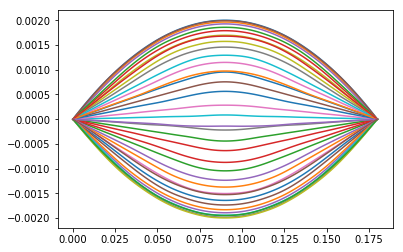

In [53]:
x_lin, matrix = first_task(x,t,phi, L, T, E, rho)
for i in range(0, t, int(t / 35)):
    plt.plot(x_lin,matrix[i])
plt.show()

In [56]:
def second_task(T, t, x, y, phi, f, a, b):
    dt = T/t
    dx = a/x
    dy = b/y
    
    C = dt/dx + dt/dy 
    if C > 1:
        raise(Exception('Condition isnt satisfied'))
        return
    
    x_lin = np.linspace(-a/2, a/2, x)
    y_lin = np.linspace(-b/2, b/2, y)
    matrix = np.zeros((t, x, y))

    for i in range(x):
        for j in range(y):
            matrix[0, i, j] = phi(x_lin[i], y_lin[j])
            
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            matrix[1, i, j] = (phi(x_lin[i], y_lin[j])+f(x_lin[i], y_lin[j])*dt+dt**2/(2*dx**2)*(matrix[0, i + 1, j]-2*matrix[0, i, j]+matrix[0, i-1, j])+dt**2/(2*dy**2)*(matrix[0, i, j + 1]-2*matrix[0, i, j]+matrix[0, i, j-1]))
            
    matrix[1, 1:-1, 0] = matrix[1, 1:-1, 1]
    matrix[1, 1:-1, -1] = matrix[1, 1:-1, -2]
    
    for t in range(1, t - 1):
        matrix[t + 1, 1:-1, 1:-1] = (2*matrix[t, 1:-1, 1:-1]-matrix[t-1, 1:-1, 1:-1]+dt**2/dx**2*(matrix[t, :-2, 1:-1]-2*matrix[t, 1:-1, 1:-1]+matrix[t, 2:, 1:-1])+dt**2/dy**2*(matrix[t, 1:-1, :-2]-2*matrix[t, 1:-1, 1:-1]+matrix[t, 1:-1, 2:]))
        matrix[t + 1, 1:-1, 0] = matrix[t + 1, 1:-1, 1]
        matrix[t + 1, 1:-1, -1] = matrix[t + 1, 1:-1, -2]
    return matrix

In [58]:
a = 2
b = 1
phi = lambda x, y: np.arctan(np.cos(np.pi * x / a))
f = lambda x, y: np.sin(2 * np.pi * x / a) * np.sin(np.pi * y / b)
T = 4
x = 100
y = 100
t = 5000

In [64]:
matrix = second_task(T, t, x, y, phi, f, a, b)
print(matrix)

[[[6.12323400e-17 6.12323400e-17 6.12323400e-17 ... 6.12323400e-17
   6.12323400e-17 6.12323400e-17]
  [3.17172935e-02 3.17172935e-02 3.17172935e-02 ... 3.17172935e-02
   3.17172935e-02 3.17172935e-02]
  [6.33390814e-02 6.33390814e-02 6.33390814e-02 ... 6.33390814e-02
   6.33390814e-02 6.33390814e-02]
  ...
  [6.33390814e-02 6.33390814e-02 6.33390814e-02 ... 6.33390814e-02
   6.33390814e-02 6.33390814e-02]
  [3.17172935e-02 3.17172935e-02 3.17172935e-02 ... 3.17172935e-02
   3.17172935e-02 3.17172935e-02]
  [6.12323400e-17 6.12323400e-17 6.12323400e-17 ... 6.12323400e-17
   6.12323400e-17 6.12323400e-17]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [3.17679307e-02 3.17679307e-02 3.17678541e-02 ... 3.16665801e-02
   3.16665035e-02 3.16665035e-02]
  [6.34401528e-02 6.34401528e-02 6.34399998e-02 ... 6.32378597e-02
   6.32377068e-02 6.32377068e-02]
  ...
  [6.32377068e-02 6.32377068e-02 6.32378597e-02 ... 6.34399998e-02
   6.34401

### You can see final images in readme